In [1]:
import numpy as np
import matplotlib.pyplot as plt

import theano
theano.config.blas.ldflags = ''
print(theano.config.blas.ldflags)

from pymc3 import Model, Beta, Binomial, Normal

%matplotlib inline

In [22]:
n = 10
k = 5 
model = Model()
with model:
    theta = Beta('theta', 9, 1)
    k_obs = Binomial('k_obs', n, theta, observed=k)

Applied logodds-transform to theta and added transformed theta_logodds to model.


In [23]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=model)
print(map_estimate)

{'theta_logodds': array(0.8472977869142574)}


In [24]:
from pymc3 import find_MAP, NUTS, sample
from scipy import optimize

with model:
    
    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)
    
    # draw N posterior samples
    N = 30000
    trace = sample(N, start=start)

Assigned NUTS to theta_logodds
 [-----------------100%-----------------] 30000 of 30000 complete in 11.4 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b3be860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d16f6d8>]], dtype=object)

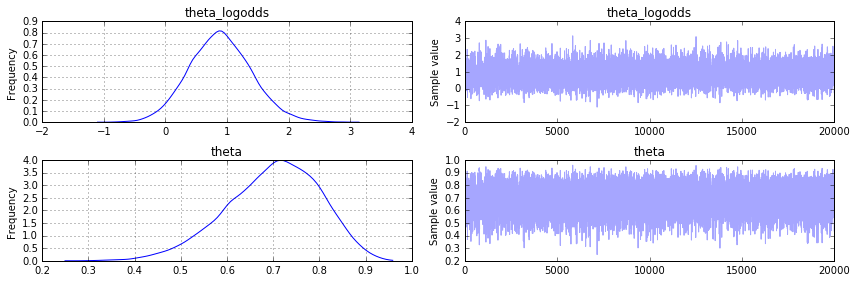

In [25]:
from pymc3 import traceplot
traceplot(trace[10000:])

In [26]:
from pymc3 import summary
summary(trace[10000:], alpha=0.01)


theta_logodds:

  Mean             SD               MC Error         99% HPD interval
  -------------------------------------------------------------------
  
  0.893            0.508            0.006            [-0.408, 2.253]

  Posterior quantiles:
  0.5            25             50             75             99.5
  |--------------|==============|==============|--------------|
  
  -0.360         0.548          0.884          1.224          2.325


theta:

  Mean             SD               MC Error         99% HPD interval
  -------------------------------------------------------------------
  
  0.699            0.101            0.001            [0.426, 0.919]

  Posterior quantiles:
  0.5            25             50             75             99.5
  |--------------|==============|==============|--------------|
  
  0.411          0.634          0.708          0.773          0.911



/Users/mjdillon/anaconda/envs/pymc3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
